Saved table image to: /Users/ekummelstedt/Desktop/table_1.png


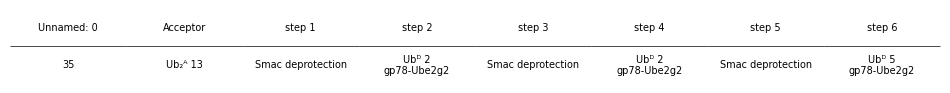

In [50]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import re

# Variables for easy adjustments
var_font_size = 10
var_row_height = 0.8
var_line_width = 0.5

# Load the Excel file
file_path = Path("/Users/ekummelstedt/Desktop/table_1.xlsx")
df = pd.read_excel(file_path)

# Set up the plot
plt.figure(figsize=(df.shape[1] * 1.5, df.shape[0] * 0.6))
plt.axis('off')

# Font definitions
font_default = FontProperties(family="DejaVu Sans", size=var_font_size)
font_fallback = FontProperties(family="DejaVu Sans", size=var_font_size)

# Unicode superscript/subscript mapping
subscript_map = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
superscript_map = {
    '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
    '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
    'a': 'ᵃ', 'b': 'ᵇ', 'c': 'ᶜ', 'd': 'ᵈ', 'e': 'ᵉ',
    'f': 'ᶠ', 'g': 'ᵍ', 'h': 'ʰ', 'i': 'ⁱ', 'j': 'ʲ',
    'k': 'ᵏ', 'l': 'ˡ', 'm': 'ᵐ', 'n': 'ⁿ', 'o': 'ᵒ',
    'p': 'ᵖ', 'r': 'ʳ', 's': 'ˢ', 't': 'ᵗ', 'u': 'ᵘ',
    'v': 'ᵛ', 'w': 'ʷ', 'x': 'ˣ', 'y': 'ʸ', 'z': 'ᶻ',
    'A': 'ᴬ', 'B': 'ᴮ', 'D': 'ᴰ', 'E': 'ᴱ', 'G': 'ᴳ',
    'H': 'ᴴ', 'I': 'ᴵ', 'J': 'ᴶ', 'K': 'ᴷ', 'L': 'ᴸ',
    'M': 'ᴹ', 'N': 'ᴺ', 'O': 'ᴼ', 'P': 'ᴾ', 'R': 'ᴿ',
    'T': 'ᵀ', 'U': 'ᵁ', 'V': 'ⱽ', 'W': 'ᵂ'
}

def format_text(text):
    # Convert _<digit> to subscript
    text = re.sub(r'_(\d)', lambda m: m.group(1).translate(subscript_map), text)
    # Convert ^<char> to superscript
    text = re.sub(r'\^([A-Za-z0-9])', lambda m: superscript_map.get(m.group(1), m.group(1)), text)
    return text

def needs_unicode(text):
    return bool(re.search(r'(_\d)|(\^[A-Za-z0-9])', text))

# Create the table
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  colLoc='center',
                  loc='center')

# Format cells
last_row_index = df.shape[0]
for (row, col), cell in table.get_celld().items():
    text_obj = cell.get_text()
    raw_text = str(text_obj.get_text())
    formatted = format_text(raw_text)

    # Choose font based on presence of special characters
    if needs_unicode(raw_text):
        text_obj.set_fontproperties(font_fallback)
    else:
        text_obj.set_fontproperties(font_default)

    text_obj.set_text(formatted)
    text_obj.set_verticalalignment('center')
    text_obj.set_horizontalalignment('center')

    cell.set_height(var_row_height)
    cell.set_linewidth(0)

    if row == 1:
        cell.set_linewidth(var_line_width)
        cell.visible_edges = 'T'

# Save to PNG
output_path = "/Users/ekummelstedt/Desktop/table_1.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

print(f"Saved table image to: {output_path}")

In [2]:
!pip install -q matplotlib pandas openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
